# Stationarity Check for Stocks

## Import libraries

In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [3]:
tickers = ["MSFT"]
df = yf.download(tickers=tickers, start="2016-01-01", end="2017-01-01", group_by="ticker", auto_adjust=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,49.340888,49.776890,48.496134,49.776890,53778000
2016-01-05,49.894983,50.312817,49.540732,50.003983,34079700
2016-01-06,49.340894,49.413562,48.723224,49.095642,39518900
2016-01-07,47.869391,48.586979,47.297138,47.387970,56564900
2016-01-08,47.569641,48.396228,47.369809,47.533310,48754000
...,...,...,...,...,...
2016-12-23,59.215500,59.299494,58.608878,59.019516,12403800
2016-12-27,58.991511,59.794117,58.991511,59.056839,11763200
2016-12-28,59.168839,59.168839,58.636880,58.786201,14653300


## Plot data

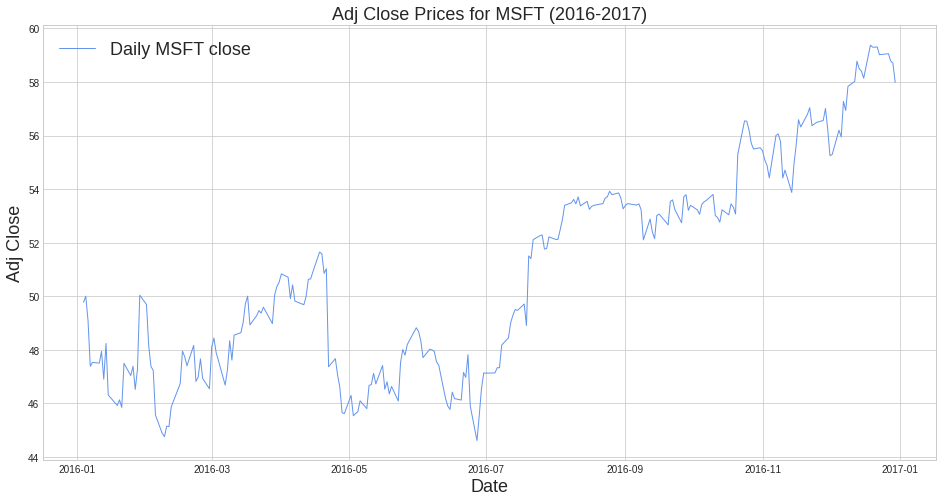

In [4]:
# plot two stocks
plt.figure(figsize=(16,8))
plt.plot(df.index, df.loc[:,"Close"], alpha=1.0, label="Daily MSFT close", linewidth=1, color="cornflowerblue", zorder=1)
plt.legend(fontsize=18)
plt.title("Adj Close Prices for MSFT (2016-2017)", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

## Stationarity test functions

In [5]:
# ADF (H0: non-stationary)
def adf_stationarity_test(signal):
  result_adf = adfuller(signal, autolag="AIC")
  statistic = result_adf[0]
  p_value = result_adf[1]
  used_lag = result_adf[2]
  nobs = result_adf[3]
  critical_values = result_adf[4]
  icbest = result_adf[5]
  print("________________________________")
  print(" > ADF: Is the data stationary ?")
  print(f'ADF Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {used_lag}')
  print('Critial Values:')

  for key, value in critical_values.items():
      print(f'   {key}, {value}')  

  print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')
  print("________________________________")

In [6]:
# KPSS test around constant (H0: stationary around constant)
def kpss_constant_stationarity_test(signal):
  result_kpss_c = kpss(signal, regression="c")

  statistic = result_kpss_c[0]
  p_value = result_kpss_c[1]
  n_lags = result_kpss_c[2]
  critical_values = result_kpss_c[3]

  print("________________________________")
  print(" > KPSS: Is the data stationary around a constant ?")
  print(f'KPSS Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critial Values:')

  for key, value in critical_values.items():
    print(f'   {key} : {value}')
    
  print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a constant')
  print("________________________________")

In [7]:
# KPSS test around trend (H0: stationary around trend)
def kpss_trend_stationarity_test(signal):
  result_kpss_ct = kpss(signal, regression="ct")

  statistic = result_kpss_ct[0]
  p_value = result_kpss_ct[1]
  n_lags = result_kpss_ct[2]
  critical_values = result_kpss_ct[3]

  print("________________________________")
  print(" > KPSS: Is the data stationary around a trend ?")
  print(f'KPSS Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critial Values:')

  for key, value in critical_values.items():
    print(f'   {key} : {value}')
    
  print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a trend')
  print("________________________________")

## Check price series for stationarity

In [8]:
adf_stationarity_test(df.loc[:, "Close"])

________________________________
 > ADF: Is the data stationary ?
ADF Statistic: -0.8868218934538364
p-value: 0.792281174343431
num lags: 0
Critial Values:
   1%, -3.4566744514553016
   5%, -2.8731248767783426
   10%, -2.5729436702592023

Result: The series is likely not stationary
________________________________


In [9]:
kpss_constant_stationarity_test(df.loc[:, "Close"])

________________________________
 > KPSS: Is the data stationary around a constant ?
KPSS Statistic: 1.289010649420976
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely not stationary around a constant
________________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [10]:
kpss_trend_stationarity_test(df.loc[:, "Close"])

________________________________
 > KPSS: Is the data stationary around a trend ?
KPSS Statistic: 0.22666401763374727
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely not stationary around a trend
________________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## Check multiplicative return series for stationarity

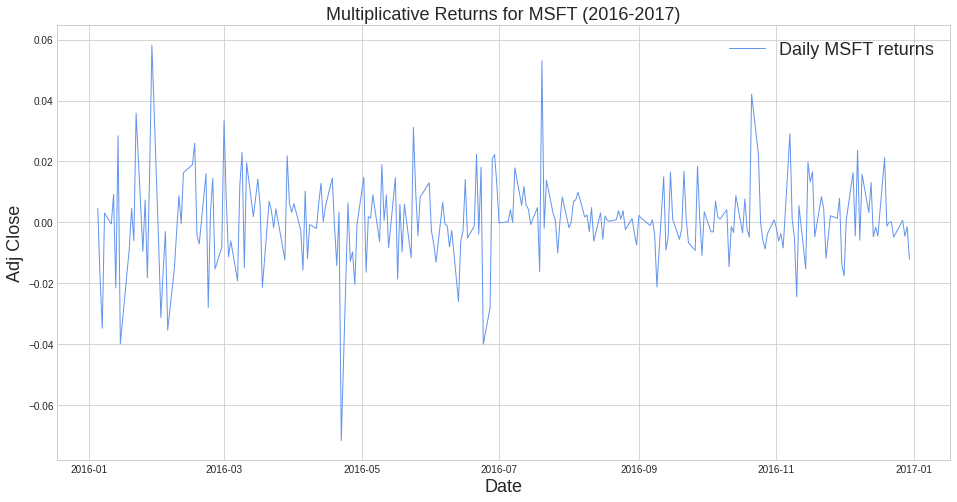

________________________________
 > ADF: Is the data stationary ?
ADF Statistic: -16.877468725683112
p-value: 1.0693031270459543e-29
num lags: 0
Critial Values:
   1%, -3.456780859712
   5%, -2.8731715065600003
   10%, -2.572968544

Result: The series is likely stationary
________________________________
________________________________
 > KPSS: Is the data stationary around a constant ?
KPSS Statistic: 0.14985268645276492
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely stationary around a constant
________________________________
________________________________
 > KPSS: Is the data stationary around a trend ?
KPSS Statistic: 0.050219359325293485
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely stationary around a trend
________________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [11]:
mult_returns = df.loc[:, 'Close'].pct_change()[1:]

plt.figure(figsize=(16,8))
plt.plot(mult_returns.index, mult_returns, alpha=1.0, label="Daily MSFT returns", linewidth=1, color="cornflowerblue", zorder=1)
plt.legend(fontsize=18)
plt.title("Multiplicative Returns for MSFT (2016-2017)", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

adf_stationarity_test(mult_returns)
kpss_constant_stationarity_test(mult_returns)
kpss_trend_stationarity_test(mult_returns)